In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dg

In [2]:
dist = 1.6
n_pts = 50
x1 = np.random.randn(n_pts) + dist
y1 = np.random.randn(n_pts) + dist
x2 = np.random.randn(n_pts) - dist
y2 = np.random.randn(n_pts) - dist

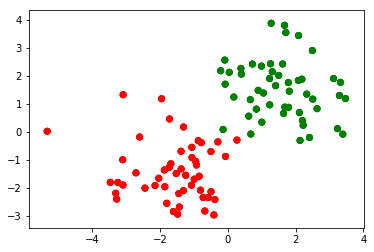

In [12]:
x_ = list(x1) + list(x2)
y_ = list(y1) + list(y2)
clr = ['green'] * n_pts + ['red'] * n_pts
plt.scatter(x_, y_, color = clr)
plt.show()

In [5]:
x_data = np.array([x_, y_]).transpose().reshape([100,2,1])
y_data = [[1,0]] * n_pts + [[0,1]] * n_pts
y_data = np.array(y_data).reshape([100,2,1])
batch_size = n_pts * 2

In [6]:
w1_stdev = 0.1
w2_stdev = 0.01

x = dg.identity(np.random.randn(batch_size, 2, 1), name = 'x')
w = dg.identity(np.random.randn(2, 2) * w1_stdev, name = 'w')
b = dg.identity(np.random.randn(2, 1) * 1, name = 'b')
y = dg.mat_add(dg.mat_mul(w, x, 'mat_mul'), b, name = 'y')
y_label = dg.identity(np.random.randn(batch_size, 2, 1), name = 'ylabel')

loss = dg.softmax_cross(y, y_label, name = 'softmax_loss')


/Users/yiqing/projects/diff_graph/dg/utils.py:40: RuntimeWarning: invalid value encountered in log
  return -np.log(soft_val)


In [7]:
x_data.shape

(100, 2, 1)

In [8]:
lr = 0.00001
sgd_optim = dg.optim.SGD(loss, [w, b], lr)
for i in range(10000):
    sgd_optim.step({x:x_data, y_label:y_data})
    if i % 100 == 0:
        print('Loss after training {} times: {}'.format(i+1, loss.data()))

Loss after training 1 times: [ 0.44835127]
Loss after training 101 times: [ 0.37328138]
Loss after training 201 times: [ 0.32079779]
Loss after training 301 times: [ 0.28246425]
Loss after training 401 times: [ 0.25336756]
Loss after training 501 times: [ 0.23055734]
Loss after training 601 times: [ 0.21219145]
Loss after training 701 times: [ 0.19707377]
Loss after training 801 times: [ 0.18439893]
Loss after training 901 times: [ 0.17360686]
Loss after training 1001 times: [ 0.16429677]
Loss after training 1101 times: [ 0.15617459]
Loss after training 1201 times: [ 0.1490198]
Loss after training 1301 times: [ 0.14266374]
Loss after training 1401 times: [ 0.13697525]
Loss after training 1501 times: [ 0.13185074]
Loss after training 1601 times: [ 0.1272073]
Loss after training 1701 times: [ 0.12297772]
Loss after training 1801 times: [ 0.11910696]
Loss after training 1901 times: [ 0.11554949]
Loss after training 2001 times: [ 0.11226729]
Loss after training 2101 times: [ 0.10922835]
Lo

In [9]:
tmp = dg.utils.batch_softmax(y.data())

In [10]:
in_acc = 0
in_acc_res = []
for i, ttt in enumerate(tmp):
    if np.argmax(ttt) != np.argmax(y_label.data()[i]):
        in_acc += 1
        in_acc_res.append(i)
print(in_acc / n_pts / 2)

0.01


In [11]:
for i in in_acc_res:
    print(x_data[i], y_label.data()[i])

[[ 0.26920883]
 [-0.29860977]] [[0]
 [1]]


In [112]:
tmp

array([[[9.99970947e-01],
        [2.90530110e-05]],

       [[9.99998740e-01],
        [1.26001206e-06]],

       [[9.99844422e-01],
        [1.55578107e-04]],

       [[9.98817558e-01],
        [1.18244173e-03]],

       [[9.99998585e-01],
        [1.41468038e-06]],

       [[9.99999871e-01],
        [1.29201552e-07]],

       [[9.02842261e-01],
        [9.71577385e-02]],

       [[9.97195837e-01],
        [2.80416271e-03]],

       [[9.98096240e-01],
        [1.90375997e-03]],

       [[9.99875214e-01],
        [1.24785713e-04]],

       [[9.99901273e-01],
        [9.87266871e-05]],

       [[9.99203472e-01],
        [7.96528299e-04]],

       [[9.99095444e-01],
        [9.04555989e-04]],

       [[9.97563889e-01],
        [2.43611132e-03]],

       [[9.87747383e-01],
        [1.22526165e-02]],

       [[9.98864327e-01],
        [1.13567317e-03]],

       [[9.99988262e-01],
        [1.17377456e-05]],

       [[9.81781253e-01],
        [1.82187471e-02]],

       [[9.99925506e-01],
  